nytimes.txt already exists, skipping download.
stations.txt already exists, skipping download.
PASADENA.dly already exists, skipping download.
Total number of stations: 115081


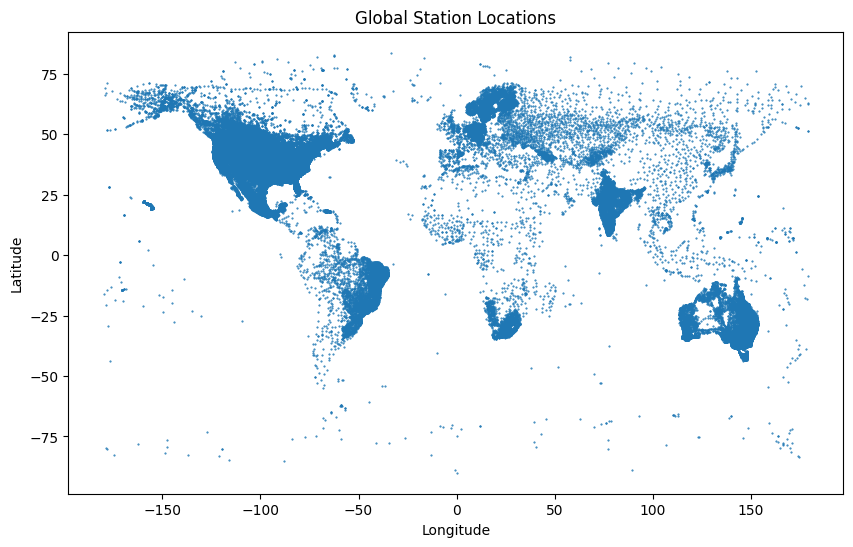

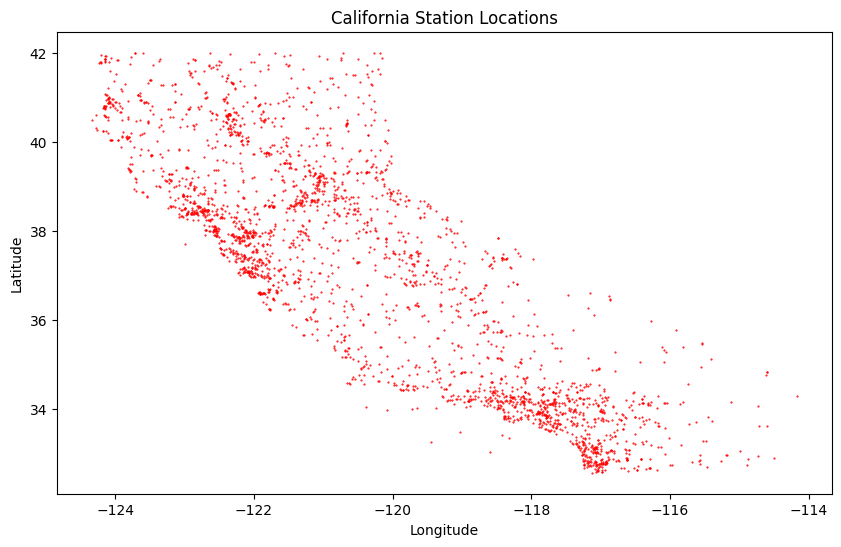

Stations matching 'PASADENA':
[('CA1NL000026', 49.0094,  -57.5849,  52.4, 'NL', 'PASADENA 0.5 SE', '', '', '')
 ('US1CALA0036', 34.1392, -118.1161, 225.2, 'CA', 'PASADENA 2.0 SE', '', '', '')
 ('US1CALA0043', 34.1619, -118.1073, 277.7, 'CA', 'PASADENA 1.8 E', '', '', '')
 ('US1CALA0091', 34.1648, -118.1249, 289. , 'CA', 'PASADENA 0.8 ENE', '', '', '')
 ('US1MDAA0010', 39.1038,  -76.5443,  13.1, 'MD', 'PASADENA 0.7 SE', '', '', '')
 ('US1MDAA0013', 39.1263,  -76.5596,  18.9, 'MD', 'PASADENA 1.1 NNW', '', '', '')
 ('US1MDAA0039', 39.0916,  -76.5112,  10.7, 'MD', 'PASADENA 2.6 ESE', '', '', '')
 ('US1TXHRR076', 29.6471,  -95.1895,  10.7, 'TX', 'PASADENA 2.4 WSW', '', '', '')
 ('US1TXHRR084', 29.6339,  -95.1881,  11.9, 'TX', 'PASADENA 2.8 SW', '', '', '')
 ('US1TXHRR093', 29.6849,  -95.2197,   9.1, 'TX', 'PASADENA 4.4 WNW', '', '', '')
 ('US1TXHRR094', 29.6746,  -95.2104,   9.1, 'TX', 'PASADENA 3.6 WNW', '', '', '')
 ('USC00046719', 34.1483, -118.1447, 263.3, 'CA', 'PASADENA', '', 'HCN', '

In [11]:
import math
import collections
import os
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

# Enable inline plotting for Jupyter
%matplotlib inline

# File paths
nytimes_path = 'nytimes.txt'
stations_path = 'stations.txt'
pasadena_path = 'PASADENA.dly'

# URLs for downloading data
nytimes_url = '/content/nytimes.txt'  # Replace with actual URL
stations_url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt'
pasadena_url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USC00046719.dly'

# Step 1: Check if files exist and download if necessary
if not os.path.exists(nytimes_path):
    print(f"Downloading {nytimes_path}...")
    urllib.request.urlretrieve(nytimes_url, nytimes_path)
else:
    print(f"{nytimes_path} already exists, skipping download.")

if not os.path.exists(stations_path):
    print(f"Downloading {stations_path}...")
    urllib.request.urlretrieve(stations_url, stations_path)
else:
    print(f"{stations_path} already exists, skipping download.")

if not os.path.exists(pasadena_path):
    print(f"Downloading {pasadena_path}...")
    urllib.request.urlretrieve(pasadena_url, pasadena_path)
else:
    print(f"{pasadena_path} already exists, skipping download.")

# Step 2: Load station data using fixed-width format
stations = np.genfromtxt(
    stations_path,
    delimiter=[11, 9, 10, 7, 3, 31, 4, 4, 6],
    names=['id', 'latitude', 'longitude', 'elevation', 'state', 'name', 'gsn', 'hcn', 'wmo'],
    dtype=['U11', 'd', 'd', 'd', 'U3', 'U31', 'U4', 'U4', 'U6'],
    autostrip=True
)

# Display total number of stations
print("Total number of stations:", len(stations))

# Plot all station locations
pp.figure(figsize=(10, 6))
pp.plot(stations['longitude'], stations['latitude'], '.', markersize=1)
pp.title("Global Station Locations")
pp.xlabel("Longitude")
pp.ylabel("Latitude")
pp.show()

# Step 3: Filter stations in California (CA)
stations_ca = stations[stations['state'] == 'CA']

# Plot stations in California
pp.figure(figsize=(10, 6))
pp.plot(stations_ca['longitude'], stations_ca['latitude'], '.', markersize=1, color='red')
pp.title("California Station Locations")
pp.xlabel("Longitude")
pp.ylabel("Latitude")
pp.show()

# Step 4: Search for a station by name (e.g., Pasadena)
pasadena_stations = stations[np.char.find(stations['name'], 'PASADENA') == 0]
print("Stations matching 'PASADENA':")
print(pasadena_stations)

# Step 5: Assuming getweather.py exists
try:
    import getweather

    # Step 6: Display the help for getweather.getyear
    help(getweather.getyear)

    # Step 7: Extract weather data for Pasadena in the year 2000
    data_2000 = getweather.getyear('PASADENA', ['TMIN', 'TMAX'], 2000)
    print("Weather data for Pasadena in 2000:")
    print(data_2000)
except ImportError:
    print("getweather module not found. Ensure it's installed or present in the working directory.")
